In [5]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(8,5)}, 
    #style="white" # nicer layout
)

In [6]:
start=2
step=1
limit=30# not included

In [7]:
nmf_coherence = pd.read_csv('../out/feature_extraction/nmf/nmf_coherence_values_{}_{}.csv'.format(start, (limit-1)))
malletlda_coherence = pd.read_csv('../out/feature_extraction/lda/ldamallet_coherence_values_{}_{}.csv'.format(start, (limit-1)))


#nmf_coherence = nmf_coherence[(nmf_coherence['Number of Topics'] >= 50) & (nmf_coherence['Number of Topics'] <= 165)]
#malletlda_coherence = malletlda_coherence[(malletlda_coherence['Number of Topics'] >= 50) & 
#                                          (malletlda_coherence['Number of Topics'] <= 165)]


nmf_coherence.drop('Unnamed: 0', axis=1, inplace=True)
nmf_coherence.set_index('Number of Topics', inplace=True)

malletlda_coherence.drop('Unnamed: 0', axis=1, inplace=True)
malletlda_coherence.set_index('Number of Topics', inplace=True)


FileNotFoundError: [Errno 2] File ../out/feature_extraction/lda/ldamallet_coherence_values_2_29.csv does not exist: '../out/feature_extraction/lda/ldamallet_coherence_values_2_29.csv'

In [6]:
coherence = nmf_coherence.join(malletlda_coherence,how='inner', lsuffix=' NMF', rsuffix = ' LDA Mallet' )
coherence.reset_index(inplace=True)
coherence.rename(columns={'Coherence Value NMF': 'NMF', 'Coherence Value LDA Mallet':'LDA Mallet'}, inplace=True)
melt = pd.melt(coherence, ['Number of Topics'])
melt.head()
melt.rename(columns={'variable': 'Topic Modelling Algorithm', 'value':'Coherence Value'}, inplace=True)


In [7]:
print(round(coherence['LDA Mallet'].values.max(), 2))
print(round(coherence['LDA Mallet'].values.min(), 2))

print(round(coherence['NMF'].values.max(), 2))
print(round(coherence['NMF'].values.min(), 2))

0.52
0.39
0.43
0.27


In [4]:
#sns.lineplot(x="Number of Topics", y="Coherence Value NMF", data=coherence)
ax_c=sns.lineplot(x='Number of Topics', y='Coherence Value', hue='Topic Modelling Algorithm', 
             data=melt, markers=True, dashes=False, style="Topic Modelling Algorithm", 
             palette=sns.color_palette("mako_r", 2),
            sort = False)


#plt.axvline(55, 0, coherence['LDA Mallet'].values.max())
#plt.axvline(45, 0,0.95, linewidth=1, color='grey', linestyle=':')
#plt.axhline(coherence['NMF'].values.max(), 0,0.05,linewidth=1, color='grey', linestyle=':')

#plt.axvline(30, 0,0.95, linewidth=1, color='grey', linestyle=':')

#plt.axvline(40, 0,0.35, linewidth=1, color='grey', linestyle=':')
plt.axhline(coherence['LDA Mallet'].values.max(), 0, 0.58,linewidth=1, color='grey', linestyle=':')
plt.axhline(coherence['NMF'].values.max(), 0,0.82,linewidth=1, color='grey', linestyle=':')

plt.xticks(coherence['Number of Topics (k)'].values)

handles, labels = ax_c.get_legend_handles_labels()
plt.legend(handles=handles[1:3], labels=labels[1:3])

#plt.axhline(coherence['LDA Mallet'].values.max(), 0, 30)
plt.show()


NameError: name 'melt' is not defined

In [9]:
n=18

In [25]:
### Helpers
def cut_keywords(row):
    all_keywords = row['Topic Keywords']
    if all_keywords != 'No Topic':
        arr = [x.strip() for x in all_keywords.split(',') if x.strip()!='_'][:10]
        
        row['Topic Keywords'] = '/'.join(arr)
    return row

def get_topics_counts(df):
    df['Topic_Keywords'].fillna('No Topic', inplace=True)
    topic_dstr = df['Topic_Keywords'].value_counts().to_frame().reset_index()
    topic_dstr.rename(columns = {'index': 'Topic Keywords', 'Topic_Keywords': '# of Readme'},
                      inplace=True)

    topic_dstr.sort_values(by=['# of Readme'], 
                           inplace=True, ascending=False)
    topic_dstr = topic_dstr.apply(cut_keywords, axis=1)
    return topic_dstr[0:20]

In [26]:
nmf_dstr = pd.read_csv('../out/feature_extraction/nmf/nmf_topics_distribution_{}.csv'.format(25))
nmf_dstr.drop('Unnamed: 0', axis=1, inplace=True)
nmf_dstr['Topic_Keywords'].fillna('No Topic', inplace=True)
nmf_topic_dstr = get_topics_counts(nmf_dstr)


lda_dstr = pd.read_csv('../out/feature_extraction/lda/ldamallet_topics_distribution_{}.csv'.format(18))
lda_dstr.drop('Unnamed: 0', axis=1, inplace=True)
lda_dstr['Topic_Keywords'].fillna('No Topic', inplace=True)
lda_topic_dstr = get_topics_counts(lda_dstr)



lda_topic_dstr.to_csv('../out/feature_extraction/lda/topics_dstr_18.csv')

In [27]:
group_a = [0,6,7,12,16]
group_b = [3,5,13]
group_c = [1,2,4,8,9,10,11,14,15,17]#7

group_a_total = sum([lda_topic_dstr.iloc[x]['# of Readme'] for x in group_a])
print(group_a_total)
group_b_total = sum([lda_topic_dstr.iloc[x]['# of Readme'] for x in group_b])
print(group_b_total)

group_c_total = sum([lda_topic_dstr.iloc[x]['# of Readme'] for x in group_c])
print(group_c_total)


277
171
531


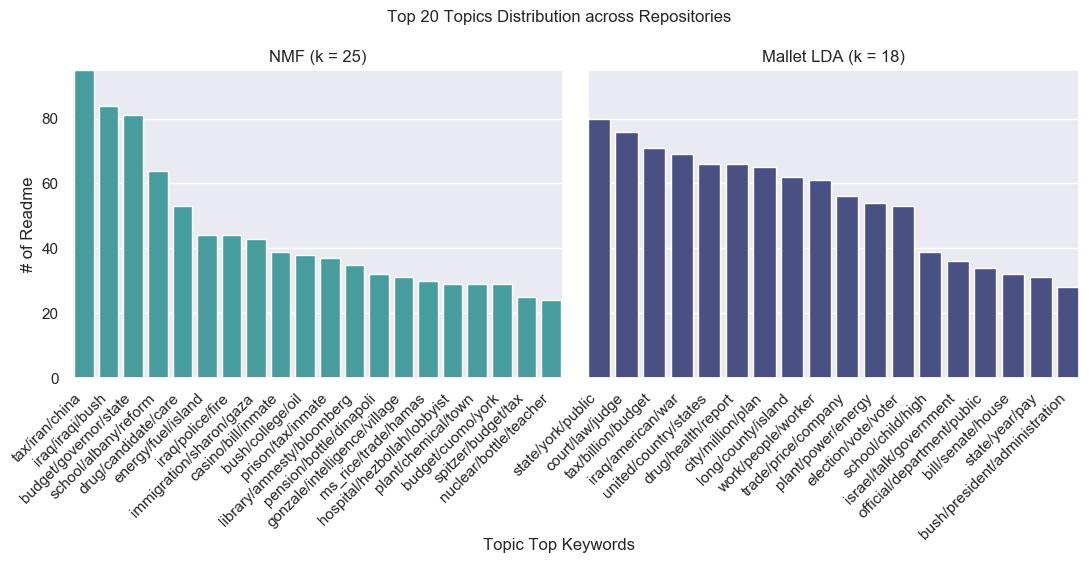

In [18]:
#sns.set_color_codes(sns.color_palette("mako_r", 2))
#plt.res
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False )

sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(9,4)}, 
    #style="white" # nicer layout
)
f, (ax1, ax2)= plt.subplots(1, 2, sharex=False, sharey=True, figsize=(13,4
                                                                     ))


f.add_subplot(ax1)
sns.barplot("Topic Keywords", y="# of Readme", data=nmf_topic_dstr, 
                color=sns.color_palette("mako_r", 2)[0])
plt.gca().set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")
plt.gca().set_title('NMF (k = 25)')
plt.gca().set_xlabel('')


f.add_subplot(ax2)
ax2= sns.barplot("Topic Keywords", y="# of Readme", 
                 data=lda_topic_dstr,
                 color=sns.color_palette("mako_r", 2)[1])
plt.gca().set_xticklabels(ax2.get_xticklabels(), rotation=45, ha="right")
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

#fig.add_subplot(axes[1])
plt.gca().set_title('Mallet LDA (k = 18)')

#plt.setp([ax1, ax2])
#plt.tight_layout()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.margins(x=0, y=0)
f.text(0.5, -0.32, 'Topic Top Keywords', ha='center')
f.text(0.5, 1, 'Top 20 Topics Distribution across Repositories', ha='center')

plt.show()